1.Introduction
    One of the problems for starting a business today is the large concentrations of businesses in an area resulting in a competition that can bring business failure. The purpose of this research will be to determine the optimal business to open in a location based on local competition.

2.Data
    I will be using shop locations and categories from New York and Toronto. All data is provided by Foursquare. The data will be cleaned and plotted on a map to show distribution and grouped to find the highest and lowest competitive business.

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    sci

In [8]:
CLIENT_ID = 'JCDDDMM4RCPU1P1IFVJOY4K1ZUKFS5UUNV3AS3KVW1CVGIR0' # your Foursquare ID
CLIENT_SECRET = 'LPM2QBRKSLTUI4VUAYXOL2LV4KEO4QLX45GYJ2DKFYSFVJMS' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 150
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JCDDDMM4RCPU1P1IFVJOY4K1ZUKFS5UUNV3AS3KVW1CVGIR0
CLIENT_SECRET:LPM2QBRKSLTUI4VUAYXOL2LV4KEO4QLX45GYJ2DKFYSFVJMS


In [22]:
city1 = 'New York'
radius = 500
geolocator1 = Nominatim(user_agent="foursquare_agent")
location1 = geolocator1.geocode(city1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print(latitude1, longitude1)

city2 = 'Toronto'

geolocator2 = Nominatim(user_agent="foursquare_agent")
location2 = geolocator2.geocode(city2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print(latitude2, longitude2)

40.7127281 -74.0060152
43.653963 -79.387207


In [23]:
search_query = 'Shop'
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
venuesNY = results['response']['venues']

# tranform venues into a dataframe
dataframeNY = json_normalize(venuesNY)
dataframeNY.head(10)

Shop .... OK!


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,venuePage.id,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4b79a5e8f964a52037082fe3,NY Gift Shop,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",v-1579274044,False,234 Canal St,at Centre St.,40.712733,-74.005978,"[{'label': 'display', 'lat': 40.71273261495395...",...,United States,"[234 Canal St (at Centre St.), New York, NY 10...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52a0a3d411d2a9c50dff1d6e,Ray's Barber Shop,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1579274044,False,46 Park Pl,Church Street,40.713416,-74.009610,"[{'label': 'display', 'lat': 40.7134161580909,...",...,United States,"[46 Park Pl (Church Street), New York, NY 1000...",73100413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4c88d0d90f3c236a088ef55c,Royal Barber Shop,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1579274044,False,Fulton Street,William St.,40.709517,-74.005787,"[{'label': 'display', 'lat': 40.709517, 'lng':...",...,United States,"[Fulton Street (William St.), New York, NY 100...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,502ab09be4b0cb6d8a90d016,Smoke Shop,"[{'id': '4bf58dd8d48988d123951735', 'name': 'S...",v-1579274044,False,20 Vesey St,btwn Church St & Broadway,40.711904,-74.010305,"[{'label': 'display', 'lat': 40.71190417219223...",...,United States,"[20 Vesey St (btwn Church St & Broadway), New ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4ec3cc39b63468c86d4c0737,Lux Accessories @ Shop Small Pop-Up Mall,"[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",v-1579274044,False,NaN,NaN,40.712781,-74.005944,"[{'label': 'display', 'lat': 40.71278084415942...",...,United States,"[New York, NY 10282, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4b475390f964a520f12e26e3,Mary's Coffee Shop,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1579274044,False,25-15 Queens Plz N,NaN,40.712786,-74.005944,"[{'label': 'display', 'lat': 40.71278567220636...",...,United States,"[25-15 Queens Plz N, Long Island City, NY 1110...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,53d3c3e4498e61807eafdb53,Iron Valley Harley Davidson Shop,[],v-1579274044,False,NaN,NaN,40.712957,-74.005941,"[{'label': 'display', 'lat': 40.7129573, 'lng'...",...,United States,"[New York, NY, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,50bdc2bde4b02abe7f6474d8,Dante Coffee Shop,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1579274044,False,"Tribeca Park , jakarta barat",NaN,40.712250,-74.005640,"[{'label': 'display', 'lat': 40.7122501081287,...",...,United States,"[Tribeca Park , jakarta barat, Jakarta barat, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,53a7307a498e56d9917d8f32,Melt Shop,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",v-1579274044,False,111 Fulton St,btwn William St & Dutch St,40.709807,-74.006723,"[{'label': 'display', 'lat': 40.709807, 'lng':...",...,United States,"[111 Fulton St (btwn William St & Dutch St), N...",NaN,Financial District,346065,https://www.seamless.com/menu/melt-shop-fulton...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png
9,4f4d2593e4b00b42c3f1060f,Potbelly Sandwich Shop,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",v-1579274044,False,280 Broadway,btwn Reade & Chambers St,40.714480,-74.005842,"[{'label': 'display', 'lat': 40.71448, 'lng': ...",...,United States,"[280 Broadway (btwn Reade & Chambers St), New ...",NaN,NaN,1400932,https://www.seamless.com/menu/potbelly-sandwic...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png


In [24]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
venuesToronto = results['response']['venues']

# tranform venues into a dataframe
dataframeToronto = json_normalize(venuesToronto)
dataframeToronto.head(10)

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4d13cab06d103704a15d1bbd,Gift Shop,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",v-1579274074,False,317 Dundas Street W,43.654151,-79.392729,"[{'label': 'display', 'lat': 43.65415122702497...",445,M5T 1G4,CA,Toronto,ON,Canada,"[317 Dundas Street W, Toronto ON M5T 1G4, Canada]",NaN,NaN
1,4b7ed424f964a5208a0230e3,Friendly Stranger - Cannabis Culture Shop,"[{'id': '4bf58dd8d48988d123951735', 'name': 'S...",v-1579274074,False,241 Queen St. W,43.650387,-79.388523,"[{'label': 'display', 'lat': 43.65038666611463...",411,M5V 1Z4,CA,Toronto,ON,Canada,"[241 Queen St. W (at St. Patrick St.), Toronto...",at St. Patrick St.,42625936
2,59e636b7840fc2686ffb51f1,Square Shop!,"[{'id': '52f2ab2ebcbc57f1066b8b3d', 'name': 'P...",v-1579274074,False,202 Queen Street West,43.650440,-79.388885,"[{'label': 'display', 'lat': 43.65044, 'lng': ...",414,M5V 1Z2,CA,Toronto,ON,Canada,"[202 Queen Street West (St Patrick), Toronto O...",St Patrick,NaN
3,4df8d2d8aeb70af3f277dcad,Jays Shop at Sears,"[{'id': '4bf58dd8d48988d1f2941735', 'name': 'S...",v-1579274074,False,290 Yonge St.,43.655823,-79.380491,"[{'label': 'display', 'lat': 43.65582278619062...",579,M5B 1C8,CA,Toronto,ON,Canada,[290 Yonge St. (in Sears at Toronto Eaton Cent...,in Sears at Toronto Eaton Centre,NaN
4,5c2346cb029a55002c80c510,F5 Shop,"[{'id': '52f2ab2ebcbc57f1066b8b36', 'name': 'I...",v-1579274074,False,1559 Bayview Ave,43.654211,-79.385715,"[{'label': 'display', 'lat': 43.65421113388417...",123,M4G 3B5,CA,East York,ON,Canada,"[1559 Bayview Ave, East York ON M4G 3B5, Canada]",NaN,NaN
5,5bf4f0b22b274a002cfa1162,The Hippie Grow Shop,"[{'id': '4bf58dd8d48988d15a941735', 'name': 'G...",v-1579274074,False,"1370 Don Mills Road, 3rd Floor",43.652688,-79.387807,"[{'label': 'display', 'lat': 43.65268772055723...",149,M3B 3N7,CA,Toronto,ON,Canada,"[1370 Don Mills Road, 3rd Floor, Toronto ON M3...",NaN,NaN
6,4cc46eefd43ba14300ff66f8,Terminal Barber Shop 2,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1579274074,False,150 Dundas St W,43.655516,-79.385548,"[{'label': 'display', 'lat': 43.655516, 'lng':...",218,M5G 1C6,CA,Toronto,ON,Canada,"[150 Dundas St W (Elizabeth), Toronto ON M5G 1...",Elizabeth,NaN
7,5400e5bb498eeeb2cdf6214e,Jays Shop at Toronto Eaton Centre,"[{'id': '4bf58dd8d48988d1f2941735', 'name': 'S...",v-1579274074,False,220 Yonge Street,43.654570,-79.380945,"[{'label': 'display', 'lat': 43.65457038772074...",508,NaN,CA,Toronto,ON,Canada,"[220 Yonge Street, Toronto ON, Canada]",NaN,NaN
8,4c6bd9de69b4ef3b4d51474e,GRIP 6th Floor Coffee Shop,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1579274074,False,179 John St.,43.651035,-79.391256,"[{'label': 'display', 'lat': 43.65103493678703...",461,M5T 1X4,CA,Toronto,ON,Canada,"[179 John St. (at Queen St.), Toronto ON M5T 1...",at Queen St.,NaN
9,4bca0a3db6c49c743f978f91,Specialty Food Shop,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",v-1579274074,False,555 University Ave,43.657319,-79.387842,"[{'label': 'display', 'lat': 43.65731912655022...",377,M5G 1X3,CA,Toronto,ON,Canada,"[555 University Ave (at Gerrard St. W), Toront...",at Gerrard St. W,NaN


In [25]:
dataframeNY.shape

(50, 25)

In [30]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columnsNY = ['name', 'categories'] + [col for col in dataframeNY.columns if col.startswith('location.')] + ['id']
dataframe_filteredNY = dataframeNY.loc[:, filtered_columnsNY]
filtered_columnsToronto = ['name', 'categories'] + [col for col in dataframeToronto.columns if col.startswith('location.')] + ['id']
dataframe_filteredToronto = dataframeToronto.loc[:, filtered_columnsToronto]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filteredNY['categories'] = dataframe_filteredNY.apply(get_category_type, axis=1)
dataframe_filteredNY.columns = [column.split('.')[-1] for column in dataframe_filteredNY.columns]
dataframe_filteredToronto['categories'] = dataframe_filteredToronto.apply(get_category_type, axis=1)
dataframe_filteredToronto.columns = [column.split('.')[-1] for column in dataframe_filteredToronto.columns]

In [31]:
dataframe_filteredNY

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,NY Gift Shop,Gift Shop,234 Canal St,at Centre St.,40.712733,-74.005978,"[{'label': 'display', 'lat': 40.71273261495395...",3,10013,US,New York,NY,United States,"[234 Canal St (at Centre St.), New York, NY 10...",NaN,4b79a5e8f964a52037082fe3
1,Ray's Barber Shop,Salon / Barbershop,46 Park Pl,Church Street,40.713416,-74.009610,"[{'label': 'display', 'lat': 40.7134161580909,...",312,10007,US,New York,NY,United States,"[46 Park Pl (Church Street), New York, NY 1000...",NaN,52a0a3d411d2a9c50dff1d6e
2,Royal Barber Shop,Salon / Barbershop,Fulton Street,William St.,40.709517,-74.005787,"[{'label': 'display', 'lat': 40.709517, 'lng':...",357,10038,US,New York,NY,United States,"[Fulton Street (William St.), New York, NY 100...",NaN,4c88d0d90f3c236a088ef55c
3,Smoke Shop,Smoke Shop,20 Vesey St,btwn Church St & Broadway,40.711904,-74.010305,"[{'label': 'display', 'lat': 40.71190417219223...",373,10007,US,New York,NY,United States,"[20 Vesey St (btwn Church St & Broadway), New ...",NaN,502ab09be4b0cb6d8a90d016
4,Lux Accessories @ Shop Small Pop-Up Mall,Jewelry Store,NaN,NaN,40.712781,-74.005944,"[{'label': 'display', 'lat': 40.71278084415942...",8,10282,US,New York,NY,United States,"[New York, NY 10282, United States]",NaN,4ec3cc39b63468c86d4c0737
5,Mary's Coffee Shop,Coffee Shop,25-15 Queens Plz N,NaN,40.712786,-74.005944,"[{'label': 'display', 'lat': 40.71278567220636...",8,11101,US,Long Island City,NY,United States,"[25-15 Queens Plz N, Long Island City, NY 1110...",NaN,4b475390f964a520f12e26e3
6,Iron Valley Harley Davidson Shop,None,NaN,NaN,40.712957,-74.005941,"[{'label': 'display', 'lat': 40.7129573, 'lng'...",26,NaN,US,New York,NY,United States,"[New York, NY, United States]",NaN,53d3c3e4498e61807eafdb53
7,Dante Coffee Shop,Coffee Shop,"Tribeca Park , jakarta barat",NaN,40.712250,-74.005640,"[{'label': 'display', 'lat': 40.7122501081287,...",61,10013,US,Jakarta barat,NY,United States,"[Tribeca Park , jakarta barat, Jakarta barat, ...",NaN,50bdc2bde4b02abe7f6474d8
8,Melt Shop,Sandwich Place,111 Fulton St,btwn William St & Dutch St,40.709807,-74.006723,"[{'label': 'display', 'lat': 40.709807, 'lng':...",330,10038,US,New York,NY,United States,"[111 Fulton St (btwn William St & Dutch St), N...",Financial District,53a7307a498e56d9917d8f32
9,Potbelly Sandwich Shop,Sandwich Place,280 Broadway,btwn Reade & Chambers St,40.714480,-74.005842,"[{'label': 'display', 'lat': 40.71448, 'lng': ...",195,10007,US,New York,NY,United States,"[280 Broadway (btwn Reade & Chambers St), New ...",NaN,4f4d2593e4b00b42c3f1060f


In [32]:
dataframe_filteredToronto

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Gift Shop,Gift Shop,317 Dundas Street W,43.654151,-79.392729,"[{'label': 'display', 'lat': 43.65415122702497...",445,M5T 1G4,CA,Toronto,ON,Canada,"[317 Dundas Street W, Toronto ON M5T 1G4, Canada]",NaN,4d13cab06d103704a15d1bbd
1,Friendly Stranger - Cannabis Culture Shop,Smoke Shop,241 Queen St. W,43.650387,-79.388523,"[{'label': 'display', 'lat': 43.65038666611463...",411,M5V 1Z4,CA,Toronto,ON,Canada,"[241 Queen St. W (at St. Patrick St.), Toronto...",at St. Patrick St.,4b7ed424f964a5208a0230e3
2,Square Shop!,Pop-Up Shop,202 Queen Street West,43.650440,-79.388885,"[{'label': 'display', 'lat': 43.65044, 'lng': ...",414,M5V 1Z2,CA,Toronto,ON,Canada,"[202 Queen Street West (St Patrick), Toronto O...",St Patrick,59e636b7840fc2686ffb51f1
3,Jays Shop at Sears,Sporting Goods Shop,290 Yonge St.,43.655823,-79.380491,"[{'label': 'display', 'lat': 43.65582278619062...",579,M5B 1C8,CA,Toronto,ON,Canada,[290 Yonge St. (in Sears at Toronto Eaton Cent...,in Sears at Toronto Eaton Centre,4df8d2d8aeb70af3f277dcad
4,F5 Shop,IT Services,1559 Bayview Ave,43.654211,-79.385715,"[{'label': 'display', 'lat': 43.65421113388417...",123,M4G 3B5,CA,East York,ON,Canada,"[1559 Bayview Ave, East York ON M4G 3B5, Canada]",NaN,5c2346cb029a55002c80c510
5,The Hippie Grow Shop,Garden,"1370 Don Mills Road, 3rd Floor",43.652688,-79.387807,"[{'label': 'display', 'lat': 43.65268772055723...",149,M3B 3N7,CA,Toronto,ON,Canada,"[1370 Don Mills Road, 3rd Floor, Toronto ON M3...",NaN,5bf4f0b22b274a002cfa1162
6,Terminal Barber Shop 2,Salon / Barbershop,150 Dundas St W,43.655516,-79.385548,"[{'label': 'display', 'lat': 43.655516, 'lng':...",218,M5G 1C6,CA,Toronto,ON,Canada,"[150 Dundas St W (Elizabeth), Toronto ON M5G 1...",Elizabeth,4cc46eefd43ba14300ff66f8
7,Jays Shop at Toronto Eaton Centre,Sporting Goods Shop,220 Yonge Street,43.654570,-79.380945,"[{'label': 'display', 'lat': 43.65457038772074...",508,NaN,CA,Toronto,ON,Canada,"[220 Yonge Street, Toronto ON, Canada]",NaN,5400e5bb498eeeb2cdf6214e
8,GRIP 6th Floor Coffee Shop,Coffee Shop,179 John St.,43.651035,-79.391256,"[{'label': 'display', 'lat': 43.65103493678703...",461,M5T 1X4,CA,Toronto,ON,Canada,"[179 John St. (at Queen St.), Toronto ON M5T 1...",at Queen St.,4c6bd9de69b4ef3b4d51474e
9,Specialty Food Shop,Food & Drink Shop,555 University Ave,43.657319,-79.387842,"[{'label': 'display', 'lat': 43.65731912655022...",377,M5G 1X3,CA,Toronto,ON,Canada,"[555 University Ave (at Gerrard St. W), Toront...",at Gerrard St. W,4bca0a3db6c49c743f978f91


In [33]:
cleanNY= dataframe_filteredNY.drop(['cc', 'city', 'country', 'crossStreet', 'formattedAddress',\
                                        'labeledLatLngs','neighborhood', 'id'], axis=1)
cleanNY

,name,categories,address,lat,lng,distance,postalCode,state
0,NY Gift Shop,Gift Shop,234 Canal St,40.712733,-74.005978,3,10013,NY
1,Ray's Barber Shop,Salon / Barbershop,46 Park Pl,40.713416,-74.009610,312,10007,NY
2,Royal Barber Shop,Salon / Barbershop,Fulton Street,40.709517,-74.005787,357,10038,NY
3,Smoke Shop,Smoke Shop,20 Vesey St,40.711904,-74.010305,373,10007,NY
4,Lux Accessories @ Shop Small Pop-Up Mall,Jewelry Store,NaN,40.712781,-74.005944,8,10282,NY
5,Mary's Coffee Shop,Coffee Shop,25-15 Queens Plz N,40.712786,-74.005944,8,11101,NY
6,Iron Valley Harley Davidson Shop,None,NaN,40.712957,-74.005941,26,NaN,NY
7,Dante Coffee Shop,Coffee Shop,"Tribeca Park , jakarta barat",40.712250,-74.005640,61,10013,NY
8,Melt Shop,Sandwich Place,111 Fulton St,40.709807,-74.006723,330,10038,NY
9,Potbelly Sandwich Shop,Sandwich Place,280 Broadway,40.714480,-74.005842,195,10007,NY


In [34]:
cleanToronto= dataframe_filteredToronto.drop(['cc', 'city', 'country', 'crossStreet', 'formattedAddress',\
                                        'labeledLatLngs', 'id'], axis=1)
cleanToronto

,name,categories,address,lat,lng,distance,postalCode,state
0,Gift Shop,Gift Shop,317 Dundas Street W,43.654151,-79.392729,445,M5T 1G4,ON
1,Friendly Stranger - Cannabis Culture Shop,Smoke Shop,241 Queen St. W,43.650387,-79.388523,411,M5V 1Z4,ON
2,Square Shop!,Pop-Up Shop,202 Queen Street West,43.650440,-79.388885,414,M5V 1Z2,ON
3,Jays Shop at Sears,Sporting Goods Shop,290 Yonge St.,43.655823,-79.380491,579,M5B 1C8,ON
4,F5 Shop,IT Services,1559 Bayview Ave,43.654211,-79.385715,123,M4G 3B5,ON
5,The Hippie Grow Shop,Garden,"1370 Don Mills Road, 3rd Floor",43.652688,-79.387807,149,M3B 3N7,ON
6,Terminal Barber Shop 2,Salon / Barbershop,150 Dundas St W,43.655516,-79.385548,218,M5G 1C6,ON
7,Jays Shop at Toronto Eaton Centre,Sporting Goods Shop,220 Yonge Street,43.654570,-79.380945,508,NaN,ON
8,GRIP 6th Floor Coffee Shop,Coffee Shop,179 John St.,43.651035,-79.391256,461,M5T 1X4,ON
9,Specialty Food Shop,Food & Drink Shop,555 University Ave,43.657319,-79.387842,377,M5G 1X3,ON


In [68]:
ShopNY_map = folium.Map(location=[latitude1, longitude1], zoom_start=14)

for lat, lng, name, categories, address in zip(cleanNY['lat'], cleanNY['lng'], 
                                           cleanNY['name'], cleanNY['categories'],\
                                               cleanNY['address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(ShopNY_map)  
    
ShopNY_map

In [69]:
ShopToronto_map = folium.Map(location=[latitude2, longitude2], zoom_start=14)

for lat, lng, name, categories, address in zip(cleanToronto['lat'], cleanToronto['lng'], 
                                           cleanToronto['name'], cleanToronto['categories'],\
                                               cleanToronto['address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(ShopToronto_map)  
    
ShopToronto_map

In [63]:
grByToronto = cleanToronto.groupby(['categories','address','lat','lng','distance','postalCode','state'])
grByToronto.first()

name
categories          address                        lat       lng        distance postalCode state                                           
Bookstore           162 McCaul Street              43.655629 -79.391903 421      M5T        ON                            Recycled Book Shop
Business Service    141 Ranleigh Ave #B            43.657502 -79.386215 402      M4N 1X2    ON                                   ZayZay Shop
Clothing Store      220 Yonge Street, Unit #3 102  43.653296 -79.380779 523      M5B 2H1    ON                                        J.Crew
Coffee Shop         179 John St.                   43.651035 -79.391256 461      M5T 1X4    ON                    GRIP 6th Floor Coffee Shop
Cosmetics Shop      220 Yonge St                   43.653559 -79.380405 549      M5B 2H1    ON         Beauty Boutique by Shoppers Drug Mart
                    220 Yonge Street               43.654425 -79.380925 508      M5B 2H1    ON                                 The Face Shop
                    220 Yonge Street, Box 152      43.653748 -79.380508 540      M5B 2H1    ON                                 The Body Shop
Deli / Bodega       96 Richmond St. W              43.651057 -79.383009 467      M5H 2A3    ON                                 Shopsy's Deli
Food & Drink Shop   555 University Ave             43.657319 -79.387842 377      M5G 1X3    ON                           Specialty Food Shop
Garden              1370 Don Mills Road, 3rd Floor 43.652688 -79.387807 149      M3B 3N7    ON                          The Hippie Grow Shop
Gift Shop           317 Dundas Street W            43.654151 -79.392729 445      M5T 1G4    ON                                     Gift Shop
                    555 University Ave             43.657254 -79.386692 368      M5V 1X8    ON                                5 Fifty 5 Shop
IT Services         1559 Bayview Ave               43.654211 -79.385715 123      M4G 3B5    ON                                       F5 Shop
Lawyer              1 Dundas Street West           43.655686 -79.380534 570      M5G 1Z1    ON                    Toronto Shoplifting Lawyer
Music Store         277 Queen St W                 43.650024 -79.389864 487      M5V 1Z9    ON                        Elton John Pop Up Shop
Pharmacy            555 University Ave             43.657566 -79.388477 413      M5G 1X8    ON                            Shoppers Drug Mart
                    700 Bay St                     43.658475 -79.384868 536      M5G 1Z6    ON                            Shoppers Drug Mart
Pop-Up Shop         202 Queen Street West          43.650440 -79.388885 414      M5V 1Z2    ON                                  Square Shop!
Salon / Barbershop  150 Dundas St W                43.655516 -79.385548 218      M5G 1C6    ON                        Terminal Barber Shop 2
                    346 B Dundas St. W             43.654041 -79.392850 454      M5T 1G5    ON                             Pat's Barber Shop
                    594 Bay St                     43.655874 -79.383983 335      M5G 1M5    ON                           Terminal Barbershop
Smoke Shop          241 Queen St. W                43.650387 -79.388523 411      M5V 1Z4    ON     Friendly Stranger - Cannabis Culture Shop
Sporting Goods Shop 290 Yonge St.                  43.655823 -79.380491 579      M5B 1C8    ON                            Jays Shop at Sears

In [62]:
grByNY = cleanNY.groupby(['categories','address','lat','lng','distance','postalCode','state'])
grByNY.first()

name
categories            address                      lat       lng        distance postalCode state                                         
Art Gallery           200 Church St                40.716347 -74.006953 410      10013      NY                     Nautical Shop & Gallery
Bakery                125 Chambers St              40.715470 -74.008867 388      10007      NY                               The Soda Shop
                      200 Broadway                 40.710670 -74.009243 355      10038      NY                         Buttercup Bake Shop
Candy Store           65 Nassau St                 40.709595 -74.008770 419      10038      NY                         Five Star Gift Shop
Coffee Shop           1 Liberty Plz                40.709554 -74.010576 522      10006      NY                    For Five Coffee Roasters
                      25-15 Queens Plz N           40.712786 -74.005944 8        11101      NY                          Mary's Coffee Shop
                      Tribeca Park , jakarta barat 40.712250 -74.005640 61       10013      NY                           Dante Coffee Shop
College Classroom     41 Park Row                  40.712463 -74.006728 66       10038      NY                      The Magic Costume Shop
Flower Shop           5 Maiden Ln                  40.709694 -74.009965 474      10038      NY         Send flowers NYC - 24x7 flower shop
Gift Shop             234 Canal St                 40.712733 -74.005978 3        10013      NY                                NY Gift Shop
Grocery Store         385 Broadway                 40.718378 -74.003076 676      10013      NY                       Shop Fair Supermarket
Men's Store           7 Dey St                     40.710591 -74.010021 413      10007      NY                          Joseph Tailor Shop
Office                11 Park Pl                   40.713213 -74.008417 209      10007      NY                                        Shop
                      220 Church St                40.716656 -74.006300 437      10013      NY                         The anti-donut shop
                      233 Broadway Fl 11           40.712409 -74.008512 213      10279      NY                             SHoP Architects
Salon / Barbershop    1 Platt St                   40.707439 -74.005938 588      10038      NY                         Stubble Barber Shop
                      111 Worth St                 40.715678 -74.002328 452      10013      NY                       City Hall Barber Shop
                      123 Fulton St                40.710034 -74.007294 318      10038      NY                            Alex Barber Shop
                      135 Fulton St.               40.710459 -74.007717 290      10038      NY                         Dulce's Barber Shop
                      179 Church St                40.715877 -74.007230 365      10007      NY                            ISAK Barber Shop
                      46 Park Pl                   40.713416 -74.009610 312      10007      NY                           Ray's Barber Shop
                      8 Beekman St                 40.711538 -74.006487 138      10038      NY                            Antonella's Shop
                      88 Fulton St                 40.709294 -74.006254 382      10038      NY                                 Barber Shop
                      90 William St                40.708265 -74.007723 517      10038      NY                            Expo Barber Shop
                      Fulton Street                40.709517 -74.005787 357      10038      NY                           Royal Barber Shop
Sandwich Place        111 Fulton St                40.709807 -74.006723 330      10038      NY                                   Melt Shop
                      127 Fulton Street            40.710139 -74.007363 309      10038      NY                      Potbelly Sandwich Shop
                      280 Broadway                 40.714480 -74.005842 195      10007      NY         

In [102]:
TorCount=cleanToronto.groupby('categories')['name'].count().reset_index()
TorCount.rename(columns={"name":"Toronto"})

,categories,Toronto
0,Art Gallery,1
1,Bookstore,1
2,Business Service,1
3,Clothing Store,1
4,Coffee Shop,1
5,College Classroom,2
6,Cosmetics Shop,3
7,Deli / Bodega,1
8,Food & Drink Shop,1
9,Food Court,1


In [101]:
NYCount=cleanNY.groupby('categories')['name'].count().reset_index()
NYCount.rename(columns={"name":"New York"})

,categories,New York
0,Art Gallery,1
1,Bakery,2
2,Boutique,1
3,Candy Store,2
4,Coffee Shop,3
5,College Classroom,1
6,Convenience Store,1
7,Cosmetics Shop,1
8,Deli / Bodega,1
9,Flower Shop,1


In [113]:
result = pd.merge(NYCount, TorCount, on='categories',how='outer')
result=result.rename(columns={"name_x":"New York","name_y":"Toronto"})
pd.melt(result)

,categories,New York,Toronto
0,Art Gallery,1.0,1.0
1,Bakery,2.0,NaN
2,Boutique,1.0,NaN
3,Candy Store,2.0,NaN
4,Coffee Shop,3.0,1.0
5,College Classroom,1.0,2.0
6,Convenience Store,1.0,NaN
7,Cosmetics Shop,1.0,3.0
8,Deli / Bodega,1.0,1.0
9,Flower Shop,1.0,NaN


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

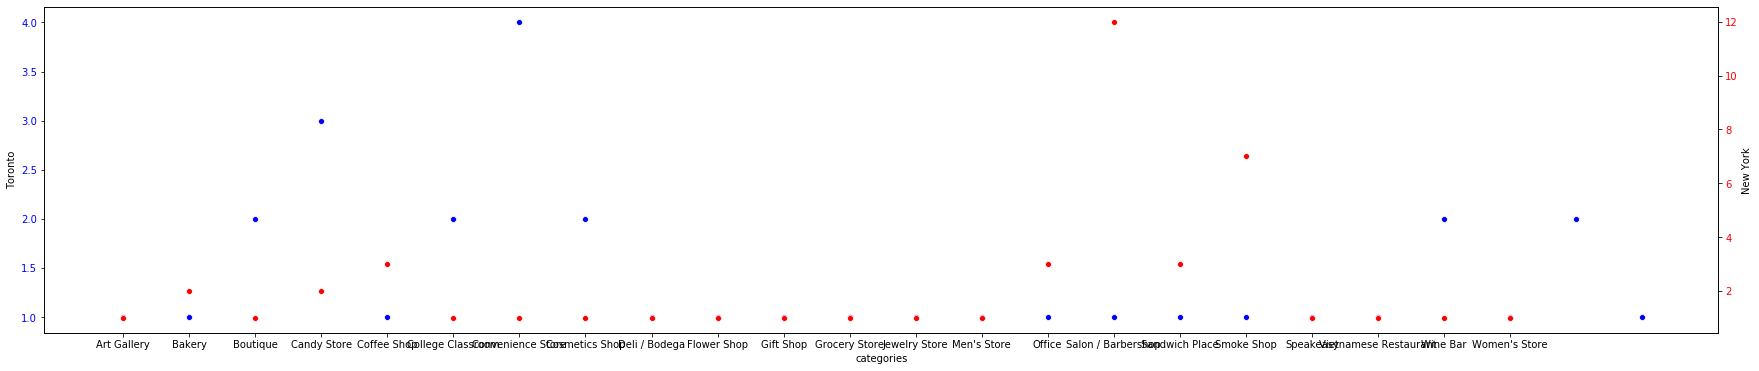

In [124]:
plt.figure(figsize=(30, 6))
ax = sns.scatterplot(x=result["categories"], y=result['Toronto'],
                     sizes=(400, 400),color="b")
ax.tick_params(axis='y', labelcolor="b")
ax2 = ax.twinx()
sns.scatterplot(x=result["categories"], y=result['New York'],
                     sizes=(400, 400),color="r")
ax2.tick_params(axis='y', labelcolor="r")
plt.show()